In [1]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'store-sales-time-series-forecasting:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F29781%2F2887556%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T032934Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35d079bbca2cbb3ffb767f01ae66dce94becf96dde2dfdc9c75b514ae8305783b92d30aaecb72a53b3cbf91564a73b2b601016fc61fa8e21fd63917bb1a574a170348685f3b180468db172885d4970c3f125820e92b5818c917acc8f1b18614d16464a7fb3b86f81f0dac77c5e77d0d942d6b6739768ed9da70ce581362ca1f82e916a853c3efa3e7baab07fe417ee1edf3bc98e1ae14ff9887cf7d025b1028ce07c4898b3904baff653ee4e08c465f4b32f5ab3e59d977108efd109cfe11216c70f22ce77dfe0edd6c06088521155ba42cd86fefd7fcdbf7a9218ed15420b0a9277c8a5fea2f84bf2108d8331d5a51b473a1793151c27b8c7dd45d76bc8a87e'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# load in datasets

holidaysdf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/holidays_events.csv")
oildf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/oil.csv")
sampledf = pd.read_csv('D:/Local Disk C/Python project/src/tugas sains data/sales data/sample_submission.csv')
storesdf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/stores.csv")
testdf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/test.csv")
traindf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/train.csv")
transactionsdf = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/transactions.csv")


In [5]:
storesdf['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

# 1. EDA to Understand Dataset

In [6]:
# merge all available datasets for EDA (except holidays)

merge1 = pd.merge(traindf, oildf, on='date', how='left')
merge2 = pd.merge(merge1, transactionsdf, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, storesdf, on='store_nbr', how='left')

merge3.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13


In [7]:
# look at holidays dataset

holidaysdf.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# drop holidays that were transferred and those that aren't national holidays

holidaysdf = holidaysdf[holidaysdf.transferred != True]
holidaysdf = holidaysdf[holidaysdf.locale == 'National']

holidaysdf = holidaysdf.drop(columns=['type', 'locale', 'locale_name', 'transferred'])

In [9]:
# merge national holidays with merge3 to create df for EDA

merge4 = pd.merge(merge3, holidaysdf, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

df = merge4
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano


In [10]:
# review new df

df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   dcoilwtico    float64
 7   transactions  float64
 8   city          object 
 9   state         object 
 10  type          object 
 11  cluster       int64  
 12  holiday       object 
dtypes: float64(3), int64(4), object(6)
memory usage: 298.3+ MB


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,3008016.00,3008016.00,3008016.00,3008016.00,2074248.00,2761935.00,3008016.00
mean,1501507.63,27.50,358.27,2.61,67.91,1695.50,8.48
std,865730.31,15.59,1103.51,12.26,25.66,964.18,4.65
min,0.00,1.00,0.00,0.00,26.19,5.00,1.00
25%,752003.75,14.00,0.00,0.00,46.39,1046.00,4.00
50%,1502225.50,27.50,11.00,0.00,53.36,1394.00,8.50
75%,2248883.25,41.00,196.00,0.00,95.78,2080.00,13.00
max,3000887.00,54.00,124717.00,741.00,110.62,8359.00,17.00


In [11]:
# check for null values

df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       933768
transactions     246081
city                  0
state                 0
type                  0
cluster               0
holiday         2758536
dtype: int64

In [12]:
# fill null oil price values with interpolate method, and all others back/forward fill

def oil_nulls(x):
    if x.notnull().sum() > 1:
        return x.interpolate().ffill().bfill()
    else:
        return x.ffill().bfill()

df['dcoilwtico'] = oil_nulls(df['dcoilwtico'])
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
transactions     246081
city                  0
state                 0
type                  0
cluster               0
holiday         2758536
dtype: int64

In [13]:
# write a function to create new columns for year, month, day, and day name

def date_features(x):
    x['date'] = pd.to_datetime(x['date'])

    x['year'] = x['date'].dt.year
    x['month'] = x['date'].dt.month
    x['day'] = x['date'].dt.day
    x['day_name'] = x['date'].dt.day_name()
    return x

df = date_features(df)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday


In [14]:
# let's take a sample of our data so that EDA goes more smoothly

df1 = df.sample(n=300000).reset_index()

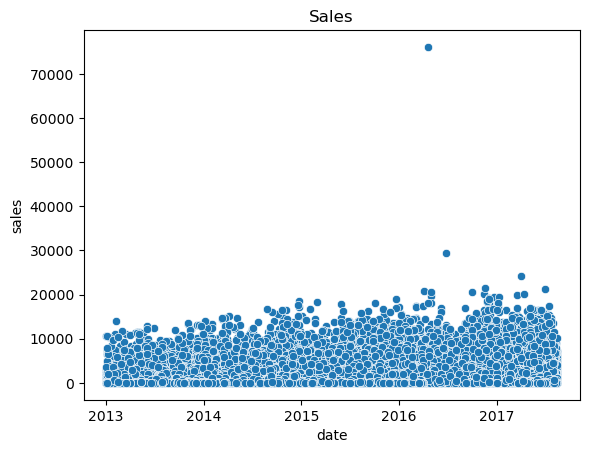

In [15]:
# checking scatter plot for outliers

ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

In [16]:
df1.describe()

,index,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster,year,month,day
count,3.000000e+05,3.000000e+05,300000,300000.000000,300000.000000,300000.000000,300000.000000,275564.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.505779e+06,1.503271e+06,2015-04-25 22:38:47.040000256,27.460227,358.223490,2.628407,67.797962,1695.169924,8.490550,2014.842733,6.202000,15.628447
min,1.300000e+01,1.300000e+01,2013-01-01 00:00:00,1.000000,0.000000,0.000000,26.190000,5.000000,1.000000,2013.000000,1.000000,1.000000
25%,7.532632e+05,7.532632e+05,2014-02-28 00:00:00,14.000000,0.000000,0.000000,46.370000,1045.000000,4.000000,2014.000000,3.000000,8.000000
50%,1.503314e+06,1.501532e+06,2015-04-25 00:00:00,27.000000,11.000000,0.000000,53.263645,1394.000000,9.000000,2015.000000,6.000000,16.000000
75%,2.259060e+06,2.251932e+06,2016-06-20 00:00:00,41.000000,197.000000,0.000000,95.720000,2079.000000,13.000000,2016.000000,9.000000,23.000000
max,3.008014e+06,3.000886e+06,2017-08-15 00:00:00,54.000000,76090.000000,710.000000,110.620000,8359.000000,17.000000,2017.000000,12.000000,31.000000
std,8.686999e+05,8.660855e+05,NaN,15.595399,1104.680013,12.336770,25.654252,964.049295,4.647935,1.346101,3.387426,8.801792


In [17]:
# getting rid of outliers in original df

for i in range(1,len(df.store_nbr.unique())+1):
    val = df[df.store_nbr == i].sales.quantile(0.99)
    df = df.drop(df[(df.store_nbr==i) & (df.sales > val)].index)

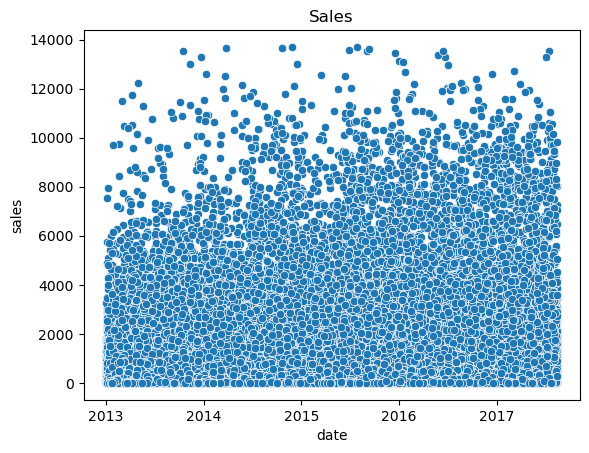

In [18]:
# checking scatter plot for outliers again

df1 = df.sample(n=300000).reset_index()

ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

In [19]:
df_lain = df1[['month','sales']]
df_lain.head()

,month,sales
0,9,10.0
1,1,0.0
2,1,2577.0
3,1,361.0
4,12,4.0


In [20]:
df1[df1['sales']==997.441]

,index,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name


In [21]:
df_lain[df_lain['month']==1].mean()

month      1.00000
sales    289.72151
dtype: float64

Rata2

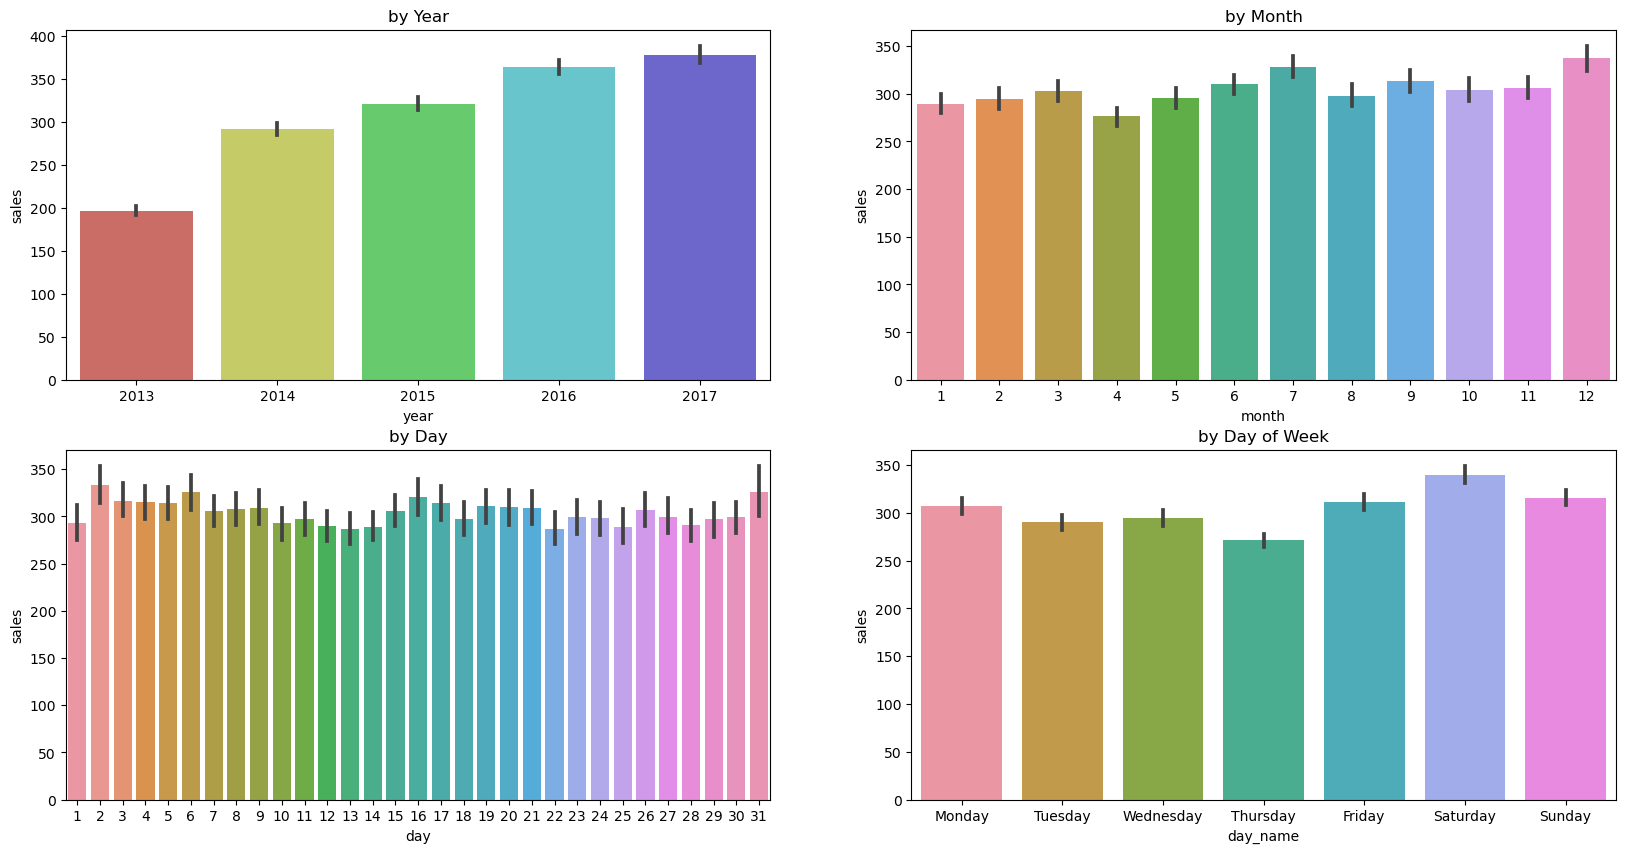

In [22]:
# viewing sales data

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette('hls')
fig, axs = plt.subplots(2, 2, figsize=(20,10))

sns.barplot(x='year', y='sales', data=df1, ax=axs[0,0])
sns.barplot(x='month', y='sales', data=df1, ax=axs[0,1])
sns.barplot(x='day', y='sales', data=df1, ax=axs[1,0])
sns.barplot(x='day_name', y='sales', data=df1, ax=axs[1,1], order=order)

axs[0,0].set_title('by Year')
axs[0,1].set_title('by Month')
axs[1,0].set_title('by Day')
axs[1,1].set_title('by Day of Week')
plt.show()

#### Observations:

1. Sales have been steadily increasing from 2013 to 2017
2. Sales are higher in December
3. Sales are higher towards the beginning of the  month
4. Sales are higher on weekends

We will use this information for feature engineering later

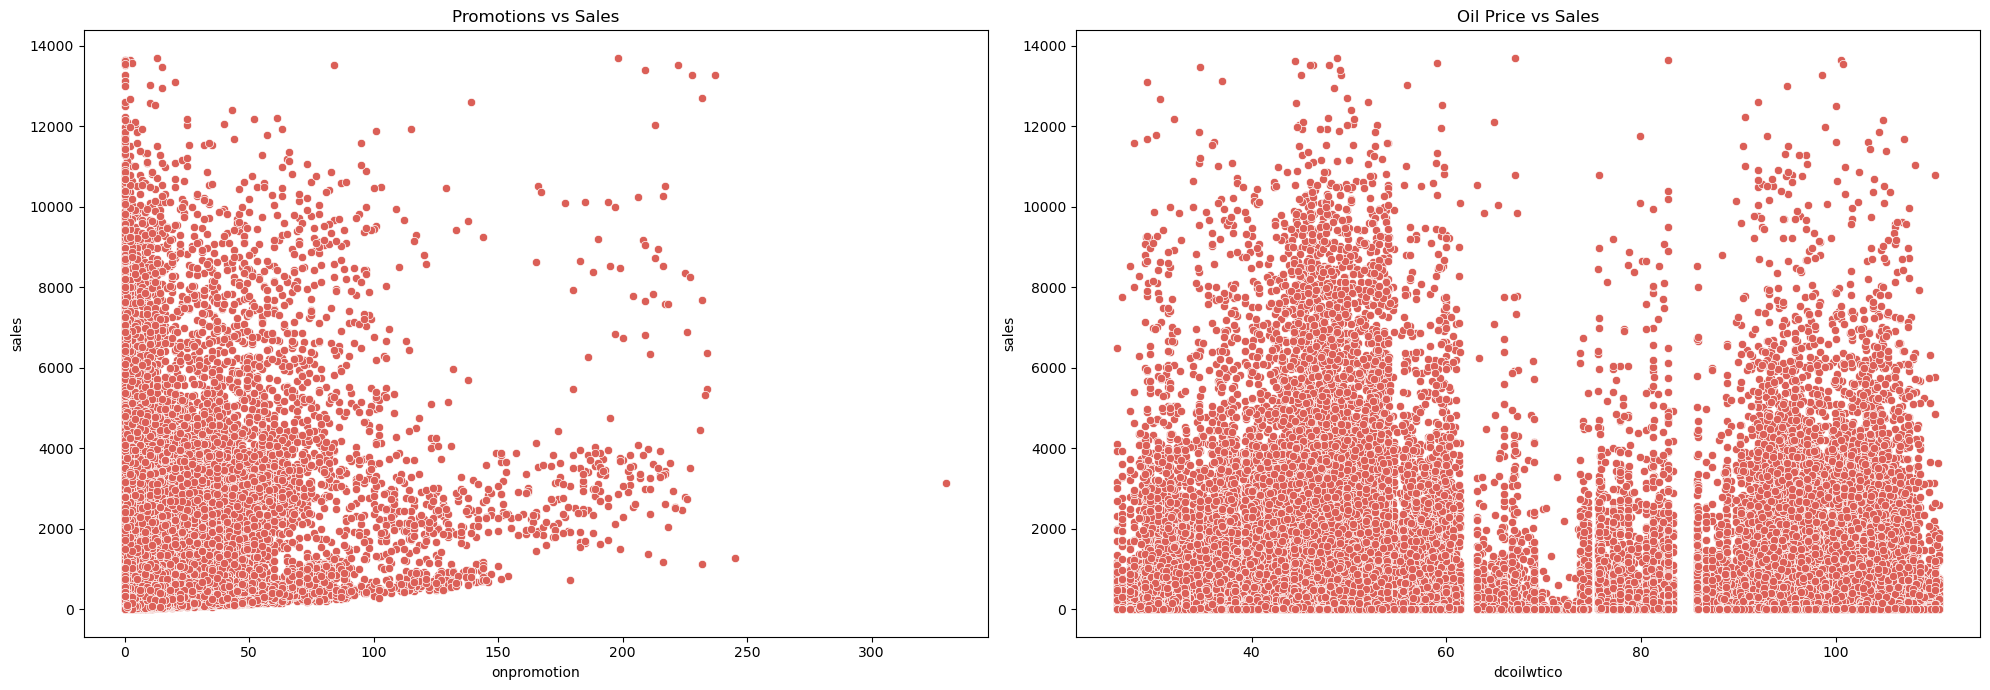

In [23]:
# let's see the effect promotions and oil prices have on sales

fig, axs = plt.subplots(1, 2, figsize=(20,7))

sns.scatterplot(data=df1, x='onpromotion', y='sales', ax=axs[0])
ax = sns.scatterplot(data=df1, x='dcoilwtico', y='sales', ax=axs[1])

axs[0].set_title('Promotions vs Sales')
axs[1].set_title('Oil Price vs Sales')

plt.tight_layout()
plt.show()

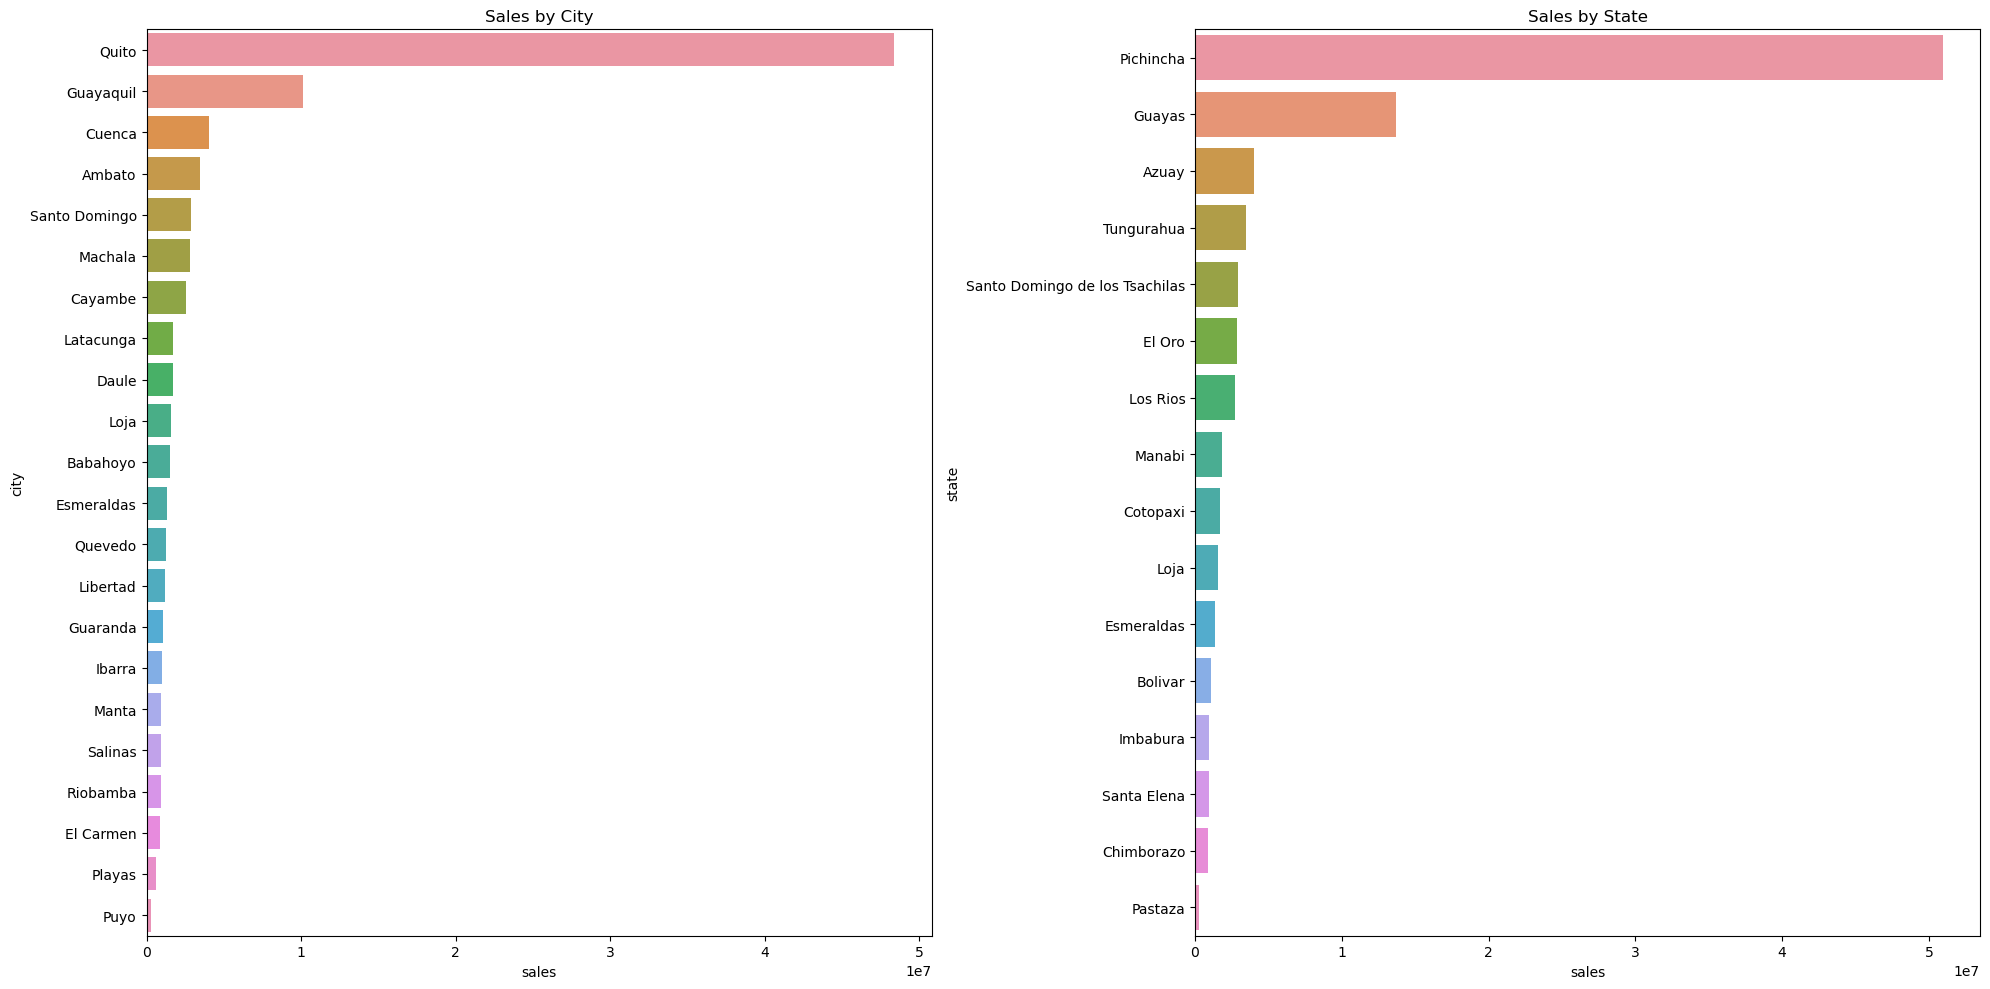

In [24]:
# let's see which cities are selling the most

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x='sales', y='city', data=df1.groupby('city')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[0])
sns.barplot(x='sales', y='state', data=df1.groupby('state')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[1])

axs[0].set_title('Sales by City')
axs[1].set_title('Sales by State')

plt.tight_layout()
plt.show()

In [25]:
# let's check out the product families and see if we can consolidate them a bit

np.sort(df.family.unique())

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [26]:
# how is the product family

# first evaluate by sum of sales

familypivot = pd.DataFrame()
familypivot = df.groupby(by='family')['sales'].sum().sort_values(ascending=False).reset_index()
familypivot.head()

# then evaluate by percentage of sales

total = familypivot['sales'].sum()
familypivot['percentage']=(familypivot['sales']/total)

familypivot.head()

,family,sales,percentage
0,GROCERY I,2.198273e+08,0.244178
1,BEVERAGES,1.843857e+08,0.204811
2,PRODUCE,1.055710e+08,0.117265
3,CLEANING,9.715241e+07,0.107914
4,DAIRY,6.462747e+07,0.071786


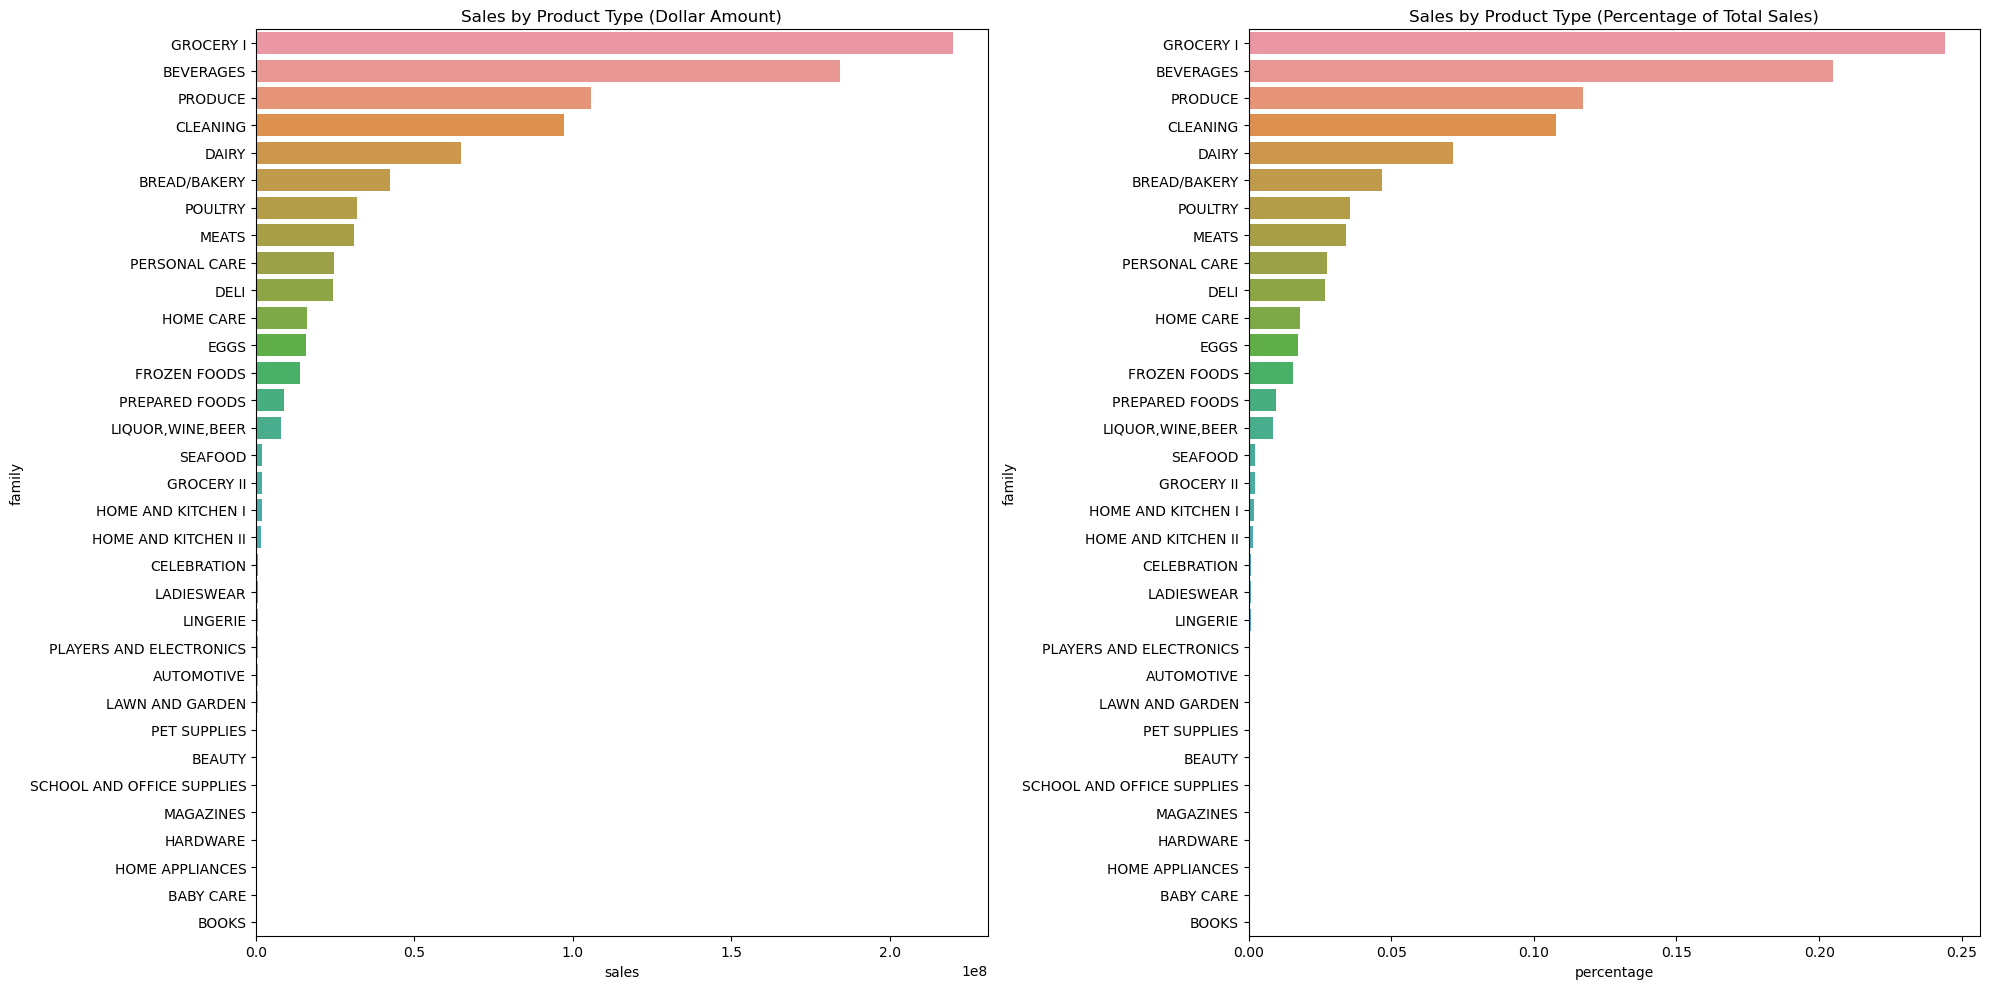

In [27]:
# visualize sales by the raw dollar amount and as a percentage of total sales

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(data=familypivot, x='sales', y='family', ax=axs[0])
sns.barplot(data=familypivot, x='percentage', y='family', ax=axs[1])

axs[0].set_title('Sales by Product Type (Dollar Amount)')
axs[1].set_title('Sales by Product Type (Percentage of Total Sales)')

plt.tight_layout()
plt.show()

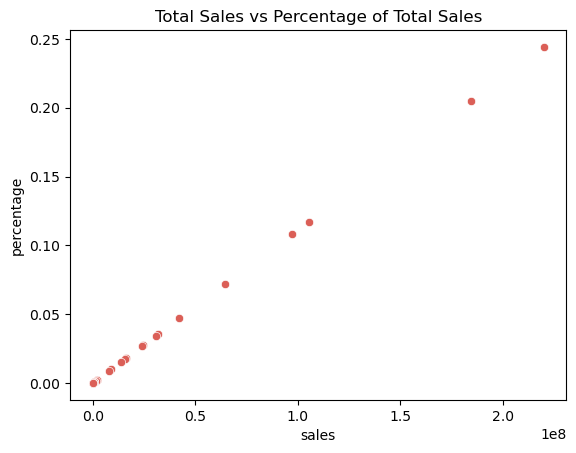

In [28]:
ax = sns.scatterplot(data=familypivot, x='sales', y='percentage')
ax.set_title('Total Sales vs Percentage of Total Sales')

plt.show()

In [29]:
family_map       = {'AUTOMOTIVE': 'rest',
                   'BABY CARE': 'rest',
                   'BEAUTY': 'rest',
                   'BOOKS': 'rest',
                   'CELEBRATION': 'rest',
                   'GROCERY II': 'rest',
                   'HARDWARE': 'rest',
                   'HOME AND KITCHEN I': 'rest',
                   'HOME AND KITCHEN II': 'rest',
                   'HOME APPLIANCES': 'rest',
                   'LADIESWEAR': 'rest',
                   'LAWN AND GARDEN': 'rest',
                   'LINGERIE': 'rest',
                   'MAGAZINES': 'rest',
                   'PET SUPPLIES': 'rest',
                   'PLAYERS AND ELECTRONICS': 'rest',
                   'SCHOOL AND OFFICE SUPPLIES': 'rest',
                   'SEAFOOD': 'rest',
                   'DELI': 'fifth',
                    'EGGS': 'sixth',
                    'FROZEN FOODS': 'sixth',
                    'HOME CARE': 'sixth',
                    'LIQUOR,WINE,BEER': 'sixth',
                    'PREPARED FOODS': 'sixth',
                    'PERSONAL CARE': 'fifth',
                    'BREAD/BAKERY': 'fourth',
                    'MEATS': 'fifth',
                    'POULTRY': 'third',
                    'CLEANING':'third',
                    'DAIRY':'fourth',
                    'PRODUCE':'third',
                    'BEVERAGES':'second',
                    'GROCERY I': 'first'
                   }

df['new_family'] = df['family'].map(family_map)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [30]:
# dropping the old family column because we don't need it anymore

df2 = df.drop(columns=['family'])
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [31]:
# replace holiday column values with "yes" if there is a national holiday

def replace_non_null(x):
    x.loc[x['holiday'].notnull(), 'holiday'] = 'yes'
    return x

df2 = replace_non_null(df2)

In [32]:
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest


In [33]:
df3 = df2.copy()

In [34]:
#Manual encoding
df3['holiday'] = df3['holiday'].replace('yes', 1).replace('no', 0)
df3['type'] = df3['type'].replace('A', 1).replace('B', 2).replace('C', 3).replace('D', 4).replace('E', 5)
df3['new_family'] = df3['new_family'].replace('first', 1).replace('second', 2).replace('third', 3).replace('fourth', 4).replace('fifth', 5).replace('sixth', 6).replace('rest', 7)

In [35]:
df3_1 = df3.loc[:df3.shape[0]/2]
df3_2 = df3.loc[df3.shape[0]/2:]

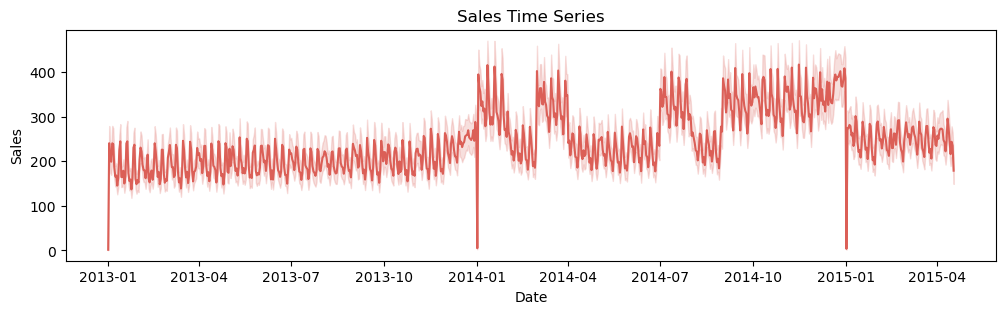

In [36]:
fig, axs = plt.subplots(figsize=(12, 3))
sns.lineplot(data=df3_1, x='date', y='sales')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


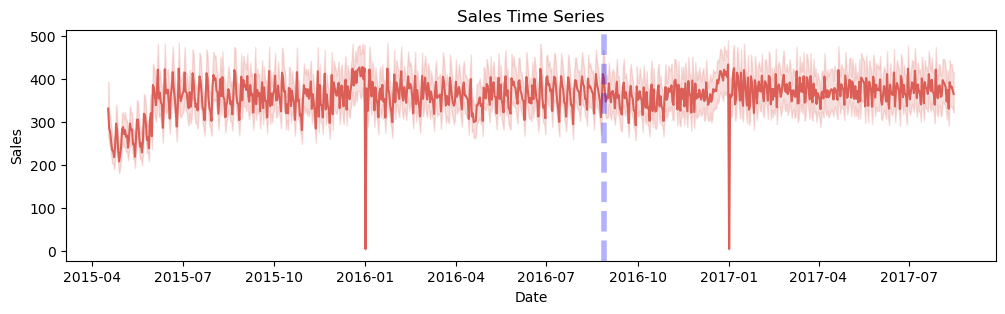

In [37]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(figsize=(12, 3))
sns.lineplot(data=df3_2, x='date', y='sales')
plt.title('Sales Time Series')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month
plt.axvline(x=pd.Timestamp('2016-08-28'),color='b',linestyle='--',linewidth=4,alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



In [38]:
hot = ['city', 'state', 'day_name'] 
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(df3[cat], prefix=cat)
    df3 = df3.join(onehots)

# Drop original columns
encode_data = df3.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data.fillna(0, inplace=True)
bool_cols = encode_data.select_dtypes(include='bool').columns.tolist()
encode_data[bool_cols] = encode_data[bool_cols].astype(float)


In [39]:
def create_features(df):
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    #df['weekofyear'] = df['date'].dt.weekofyear
    return df

encode_data = create_features(encode_data)

In [40]:
encode_data.drop(columns=['date'], inplace=True)

# 2. Predictive Analysis

In [41]:
# isolate features into X and target into y

from sklearn.model_selection import train_test_split

X, y = encode_data.drop('sales', axis=1), encode_data[['sales']]

In [42]:
# split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# create regression matrices
import xgboost as xgb

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [44]:
# generating predictions and testing model

from sklearn.metrics import mean_squared_error

params = {"objective": "reg:squarederror"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
n = 10000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250, # every 250 rounds
   early_stopping_rounds=50 # stop the training if validation loss doesn't improve for 50 consecutive rounds
)

preds = model.predict(dtest_reg)

y_test_non_negative = np.maximum(y_test, 0)
preds_non_negative = np.maximum(preds, 0)

rmse = np.sqrt(mean_squared_error(y_test_non_negative, preds_non_negative))
print(f'RMSLE: {rmse}')

[0]	train-rmse:670.94867	validation-rmse:674.39345
[250]	train-rmse:246.97218	validation-rmse:259.05751
[500]	train-rmse:234.58262	validation-rmse:252.80782
[750]	train-rmse:227.82661	validation-rmse:251.51654
[805]	train-rmse:226.43853	validation-rmse:251.52951
RMSLE: 1.3864978051628487


In [45]:
print(rmse)

1.3864978051628487


In [46]:
testdf.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [47]:
# prepare test df for evaluation

merge1 = pd.merge(testdf, oildf, on='date', how='left')
merge2 = pd.merge(merge1, transactionsdf, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, storesdf, on='store_nbr', how='left')

merge4 = pd.merge(merge3, holidaysdf, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

testdf1 = merge4

# adding oil prices and date features

testdf1['dcoilwtico'] = oil_nulls(testdf1['dcoilwtico'])
testdf1 = date_features(testdf1)


# replace family

testdf1['new_family'] = testdf1['family'].map(family_map)
testdf1 = testdf1.drop(columns=['family'])

# replace holidays with yes or null

testdf1 = replace_non_null(testdf1)

testdf1.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest


In [48]:
#Manual encoding
testdf1['holiday'] = testdf1['holiday'].replace('yes', 1).replace('no', 0)
testdf1['type'] = testdf1['type'].replace('A', 1).replace('B', 2).replace('C', 3).replace('D', 4).replace('E', 5)
testdf1['new_family'] = testdf1['new_family'].replace('first', 1).replace('second', 2).replace('third', 3).replace('fourth', 4).replace('fifth', 5).replace('sixth', 6).replace('rest', 7)

In [49]:
hot = ['city', 'state', 'day_name'] 
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(testdf1[cat], prefix=cat)
    testdf1 = testdf1.join(onehots)

# Drop original columns
encode_data_test = testdf1.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data_test.fillna(0, inplace=True)
bool_cols = encode_data_test.select_dtypes(include='bool').columns.tolist()
encode_data_test[bool_cols] = encode_data_test[bool_cols].astype(float)

In [50]:
encode_data_test = create_features(encode_data_test)

In [51]:
encode_data_test.drop(columns=['date'], inplace=True)

In [52]:
# run again on test df

encode_data_test_matrix = xgb.DMatrix(encode_data_test, enable_categorical=True)
predictions = model.predict(encode_data_test_matrix)
encode_data_test['sales'] = predictions

# change any negative predict ions to zero

encode_data_test['sales'] = encode_data_test['sales'].clip(lower=0)

In [53]:
# drop all columns not needed in submission

testdf1_fix = encode_data_test[['id', 'sales']]

testdf1_fix.head()

,id,sales
0,3000888,10.740554
1,3000889,10.740554
2,3000890,47.814983
3,3000891,713.218201
4,3000892,10.740554


In [54]:
testdf1_fix = pd.merge(testdf1_fix,testdf[['date','id']], how='left',on='id')

In [55]:
testdf1_fix.head()

,id,sales,date
0,3000888,10.740554,2017-08-16
1,3000889,10.740554,2017-08-16
2,3000890,47.814983,2017-08-16
3,3000891,713.218201,2017-08-16
4,3000892,10.740554,2017-08-16


In [56]:
testdf1_fix.drop(columns=['date'], inplace=True)

In [57]:
testdf1_fix.to_csv('submission.csv', index=False)

In [58]:
df_result = df2.groupby('date', as_index = False )['sales'].sum()
df_result

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,425067.417944
2,2013-01-03,358604.231124
3,2013-01-04,354459.677093
4,2013-01-05,425603.121229
...,...,...
1679,2017-08-11,686541.367022
1680,2017-08-12,666668.772079
1681,2017-08-13,666367.882471
1682,2017-08-14,658090.939081


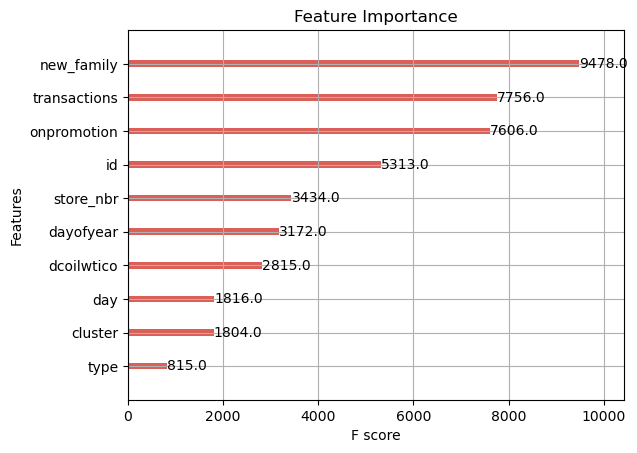

In [64]:
xgb.plot_importance(model, importance_type='weight', title='Feature Importance', max_num_features=10)
plt.show()

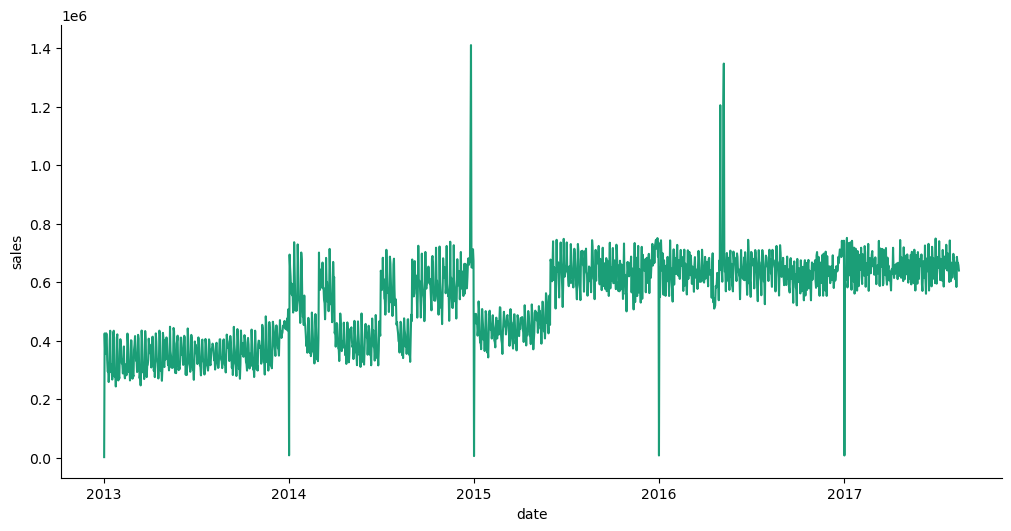

In [72]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_result.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

In [77]:
df_result2 = testdf1_fix.groupby('date', as_index = False )['sales'].sum()
df_result2

,date,sales
0,2017-08-16,420750.18750
1,2017-08-17,263474.15625
2,2017-08-18,294482.53125
3,2017-08-19,346438.31250
4,2017-08-20,354069.81250
5,2017-08-21,319172.31250
6,2017-08-22,318451.78125
7,2017-08-23,338814.28125
8,2017-08-24,282733.56250
9,2017-08-25,304512.68750


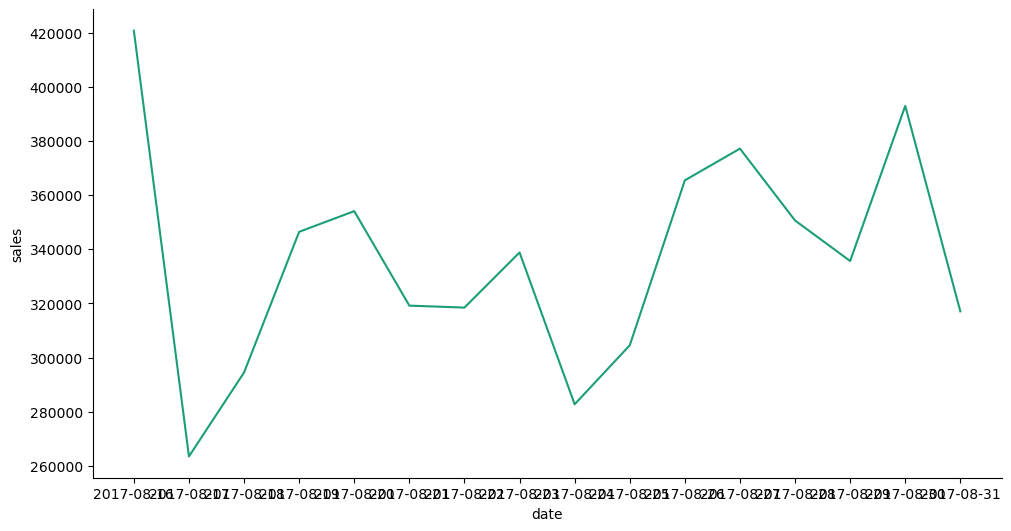

In [82]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_result2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

In [79]:
df_total = pd.concat([df_result,df_result2])
df_total.head()

,date,sales
0,2013-01-01 00:00:00,2511.618999
1,2013-01-02 00:00:00,425067.417944
2,2013-01-03 00:00:00,358604.231124
3,2013-01-04 00:00:00,354459.677093
4,2013-01-05 00:00:00,425603.121229


In [80]:
df_total.tail()

,date,sales
11,2017-08-27,377164.71875
12,2017-08-28,350627.68750
13,2017-08-29,335654.21875
14,2017-08-30,392950.09375
15,2017-08-31,317062.09375


In [84]:
df_result2['date']= pd.to_datetime(df_result2['date'])

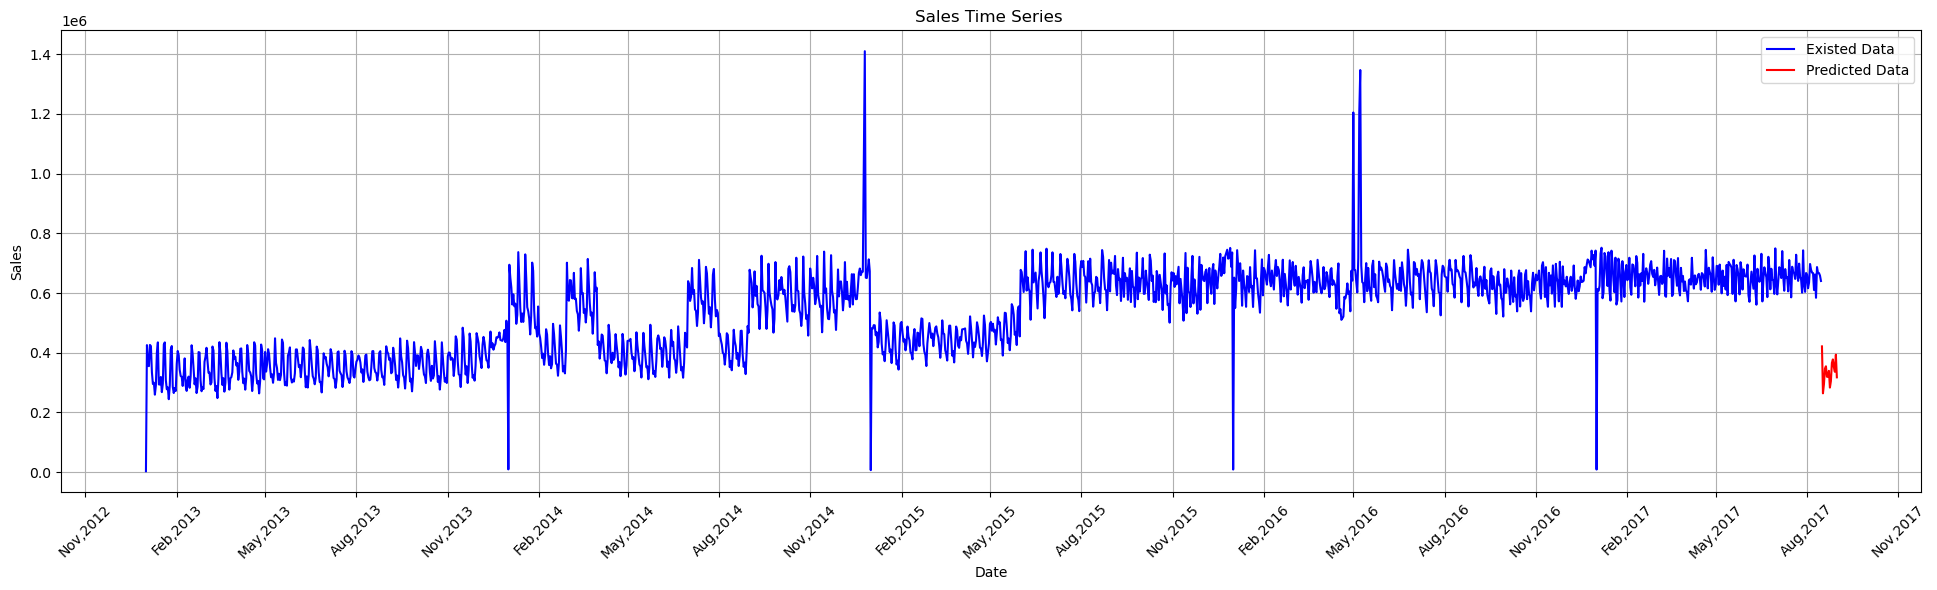

In [85]:
import matplotlib.dates as mdates
# Assuming df_result and df_result2 are already defined and have 'date' and 'sales' columns
df_total = pd.concat([df_result, df_result2])

# Create the time series plot
fig, ax = plt.subplots(figsize=(24,6))

# Plot df_result
ax.plot(df_result['date'], df_result['sales'], color='blue', label='Existed Data')

# Plot df_result2 with a different color
ax.plot(df_result2['date'], df_result2['sales'], color='red', label='Predicted Data')

# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))

# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series ')

# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.show()


Hasil Prediksi model terhadap data asli

In [89]:
df_train = df2.copy()
df_train = df_train.drop(columns=['sales'])
df_train.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest


In [90]:
#Manual encoding
df_train['holiday'] = df_train['holiday'].replace('yes', 1).replace('no', 0)
df_train['type'] = df_train['type'].replace('A', 1).replace('B', 2).replace('C', 3).replace('D', 4).replace('E', 5)
df_train['new_family'] = df_train['new_family'].replace('first', 1).replace('second', 2).replace('third', 3).replace('fourth', 4).replace('fifth', 5).replace('sixth', 6).replace('rest', 7)

In [91]:
hot = ['city', 'state', 'day_name'] 
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(df_train[cat], prefix=cat)
    df_train = df_train.join(onehots)

# Drop original columns
encode_data_test = df_train.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data_test.fillna(0, inplace=True)
bool_cols = encode_data_test.select_dtypes(include='bool').columns.tolist()
encode_data_test[bool_cols] = encode_data_test[bool_cols].astype(float)

In [92]:
encode_data_test = create_features(encode_data_test)

In [93]:
encode_data_test = encode_data_test.drop(columns=['date'])

In [94]:
df_train = encode_data_test.copy()

In [95]:
# run again on test df

df_train_matrix = xgb.DMatrix(df_train, enable_categorical=True)
predictions = model.predict(df_train_matrix)
df_train['sales'] = predictions

# change any negative predict ions to zero

df_train['sales'] = df_train['sales'].clip(lower=0)

In [100]:
df_train = pd.merge(df_train,testdf[['date','id']], how='left',on='id')

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977895 entries, 0 to 2977894
Data columns (total 61 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   id                                    int64  
 1   store_nbr                             int64  
 2   onpromotion                           int64  
 3   dcoilwtico                            float64
 4   transactions                          float64
 5   type                                  int64  
 6   cluster                               int64  
 7   holiday                               float64
 8   year                                  int32  
 9   month                                 int32  
 10  day                                   int32  
 11  new_family                            int64  
 12  city_Ambato                           float64
 13  city_Babahoyo                         float64
 14  city_Cayambe                          float64
 15  city_Cuenca    